# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_YS.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import API key from parent folder
import sys
sys.path.insert(0, '..')
from api_keys import weather_api_key

'8f23ea6936e4f58283425f4c3e550756'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
city_counts=0
cities_found=[]
# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Try to grab the weather data if the city is in the OpenWeather API
    try:
        city_counts+=1
        print(f'Processing Record {city_counts} of Set 1 | {city}')        
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)
    # Handle exceptions for a character that is not available in the OpenWeather API
    except:
        print("City not found. Skipping...")

    

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | warrnambool
Processing Record 5 of Set 1 | saryozek
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | sokoni
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | ucluelet
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | makakilo city
Processing Record 17 of Set 1 | doctor juan leon mallorquin
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | toliary
City not found. Ski

Processing Record 187 of Set 1 | coquimbo
Processing Record 188 of Set 1 | muros
Processing Record 189 of Set 1 | andenes
Processing Record 190 of Set 1 | palmer
Processing Record 191 of Set 1 | komsomolskiy
Processing Record 192 of Set 1 | tutrakan
Processing Record 193 of Set 1 | gimli
Processing Record 194 of Set 1 | chokwe
Processing Record 195 of Set 1 | port shepstone
Processing Record 196 of Set 1 | viedma
Processing Record 197 of Set 1 | saint-denis
Processing Record 198 of Set 1 | ketchikan
Processing Record 199 of Set 1 | esperance
Processing Record 200 of Set 1 | darhan
Processing Record 201 of Set 1 | fomboni
Processing Record 202 of Set 1 | sirajganj
Processing Record 203 of Set 1 | hoshcha
Processing Record 204 of Set 1 | maragogi
Processing Record 205 of Set 1 | vila franca do campo
Processing Record 206 of Set 1 | vardo
Processing Record 207 of Set 1 | windhoek
Processing Record 208 of Set 1 | kaura namoda
Processing Record 209 of Set 1 | hualmay
Processing Record 210 o

Processing Record 369 of Set 1 | muzhi
Processing Record 370 of Set 1 | geraldton
Processing Record 371 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 372 of Set 1 | saint-martin-boulogne
Processing Record 373 of Set 1 | trimbak
Processing Record 374 of Set 1 | alamosa
Processing Record 375 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 376 of Set 1 | morondava
Processing Record 377 of Set 1 | aguie
Processing Record 378 of Set 1 | svobodnyy
Processing Record 379 of Set 1 | baie-comeau
Processing Record 380 of Set 1 | kerteh
City not found. Skipping...
Processing Record 381 of Set 1 | urumqi
Processing Record 382 of Set 1 | son la
Processing Record 383 of Set 1 | makaha
Processing Record 384 of Set 1 | berdigestyakh
Processing Record 385 of Set 1 | abu samrah
Processing Record 386 of Set 1 | yar-sale
Processing Record 387 of Set 1 | saleaula
City not found. Skipping...
Processing Record 388 of Set 1 | samusu
City not found. Skipping...
Processing Re

Processing Record 551 of Set 1 | verkhnechusovskiye gorodki
Processing Record 552 of Set 1 | bathsheba
Processing Record 553 of Set 1 | pakxan
Processing Record 554 of Set 1 | merritt island
Processing Record 555 of Set 1 | balad
Processing Record 556 of Set 1 | mayaky
Processing Record 557 of Set 1 | chernyshevskiy
Processing Record 558 of Set 1 | jiaonan
Processing Record 559 of Set 1 | dwarka
Processing Record 560 of Set 1 | danville
Processing Record 561 of Set 1 | nouakchott
Processing Record 562 of Set 1 | popondetta
Processing Record 563 of Set 1 | balurghat
Processing Record 564 of Set 1 | mendahara
City not found. Skipping...
Processing Record 565 of Set 1 | coihaique
Processing Record 566 of Set 1 | ginda
Processing Record 567 of Set 1 | plettenberg bay
Processing Record 568 of Set 1 | arlit
Processing Record 569 of Set 1 | karwar
Processing Record 570 of Set 1 | magadi
Processing Record 571 of Set 1 | talaja
Processing Record 572 of Set 1 | mizdah
Processing Record 573 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# double check if there are at least 500 cities
len(cities_found)

545

In [5]:
# display the weather data into a DataFrame
city_data_df=pd.DataFrame({'city':cities_found,'Lat':lat,'Lng': lng,'Max Temp': max_temp,
                           'Humidity': humidity,'Cloudiness': cloudiness,'Wind Speed': wind_speed,'Country':country, 'Date':date})
city_data_df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,51.80,58,75,8.05,AR,1615216045
1,ostrovnoy,68.0531,39.5131,1.22,89,100,1.61,RU,1615216045
2,severo-kurilsk,50.6789,156.1250,17.40,90,95,20.22,RU,1615216046
3,warrnambool,-38.3833,142.4833,57.00,93,98,6.82,AU,1615216046
4,saryozek,44.3583,77.9753,35.83,94,100,4.54,KZ,1615216046
...,...,...,...,...,...,...,...,...,...
540,jaffna,9.6685,80.0074,80.83,82,19,12.84,LK,1615216165
541,banjar,-8.1900,114.9675,80.60,89,40,2.30,ID,1615216165
542,evensk,61.9500,159.2333,-24.41,72,12,6.40,RU,1615216165
543,bilibino,68.0546,166.4372,-25.78,83,100,4.32,RU,1615216165


In [6]:
# get the overall picture of the dataframe for potential outliers
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.475226,19.348427,55.118055,67.322936,45.634862,8.066037,1.615216e+09
std,33.569974,89.365480,30.929081,22.666912,38.887336,5.166016,7.493373e+01
min,-54.800000,-175.200000,-32.440000,7.000000,0.000000,0.160000,1.615215e+09
25%,-8.190000,-58.736800,33.800000,54.000000,1.000000,4.340000,1.615216e+09
50%,22.239400,21.416700,64.990000,73.000000,40.000000,6.910000,1.615216e+09
75%,47.440800,101.766700,79.300000,86.000000,87.000000,11.180000,1.615216e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,27.630000,1.615216e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the index of cities that have humidity over 100%.
humidity_100plus_df=(city_data_df.loc[city_data_df['Humidity']>100,:]).copy()
humidity_100plus_df.index

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data_df=(city_data_df.loc[city_data_df['Humidity']<=100,:]).copy()
clean_city_data_df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,51.80,58,75,8.05,AR,1615216045
1,ostrovnoy,68.0531,39.5131,1.22,89,100,1.61,RU,1615216045
2,severo-kurilsk,50.6789,156.1250,17.40,90,95,20.22,RU,1615216046
3,warrnambool,-38.3833,142.4833,57.00,93,98,6.82,AU,1615216046
4,saryozek,44.3583,77.9753,35.83,94,100,4.54,KZ,1615216046
...,...,...,...,...,...,...,...,...,...
540,jaffna,9.6685,80.0074,80.83,82,19,12.84,LK,1615216165
541,banjar,-8.1900,114.9675,80.60,89,40,2.30,ID,1615216165
542,evensk,61.9500,159.2333,-24.41,72,12,6.40,RU,1615216165
543,bilibino,68.0546,166.4372,-25.78,83,100,4.32,RU,1615216165


In [9]:
# output the DataFrame into csv file
clean_city_data_df.to_csv(output_data_file,index=False,header=True)

In [10]:
# change the datastamp to month/day/year format
from datetime import datetime
timestamp = clean_city_data_df['Date'].max()
dt_object = datetime.fromtimestamp(timestamp).strftime('%m/%d/%Y')
dt_object

'03/07/2021'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

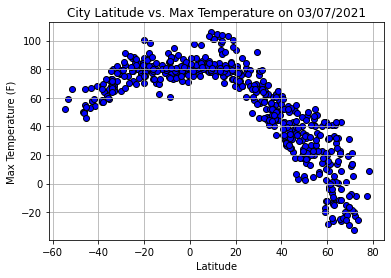

In [11]:
# gather the value and generate the scatter plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature on {dt_object}')
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

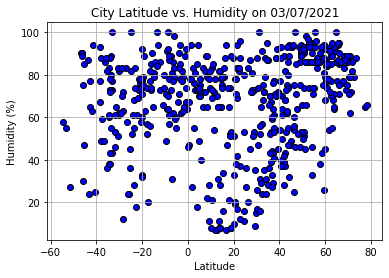

In [12]:
# gather the value and generate the scatter plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Humidity']
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity on {dt_object}')
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

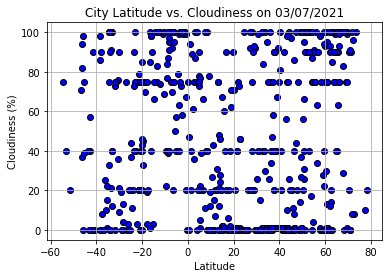

In [13]:
# gather the value and generate the scatter plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness on {dt_object}')
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

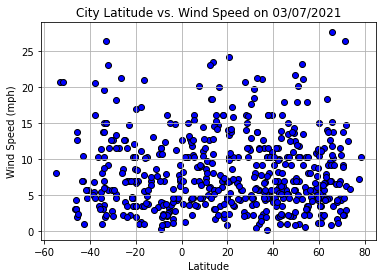

In [14]:
# gather the value and generate the scatter plot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed on {dt_object}')
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [22]:
# create the dataframe for northen hemisphere and southern hemisphere
north_df=clean_city_data_df.loc[clean_city_data_df['Lat']>=0,['Lat','Max Temp','Humidity','Cloudiness','Wind Speed']].copy()
south_df=clean_city_data_df.loc[clean_city_data_df['Lat']<=0,['Lat','Max Temp','Humidity','Cloudiness','Wind Speed']].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8110


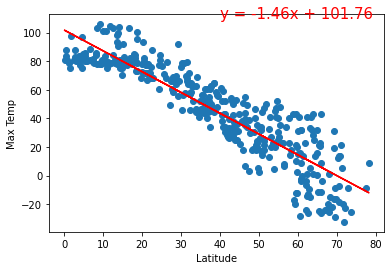

In [17]:
# gather the value and generate the scatter plot with linear regression
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,110),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4340


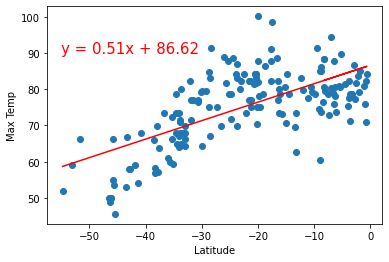

In [21]:
# gather the value and generate the scatter plot with linear regression
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1262


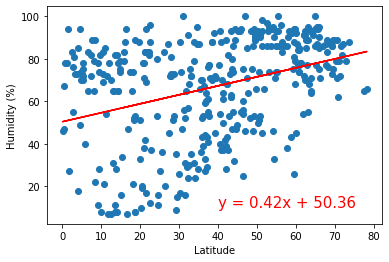

In [24]:
# gather the value and generate the scatter plot with linear regression
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0403


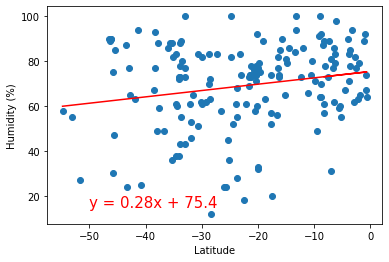

In [28]:
# gather the value and generate the scatter plot with linear regression
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0644


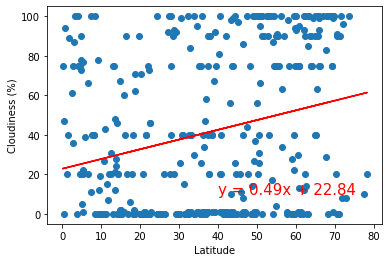

In [29]:
# gather the value and generate the scatter plot with linear regression
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0954


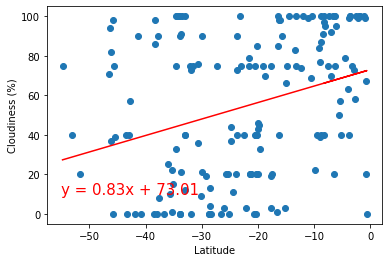

In [30]:
# gather the value and generate the scatter plot with linear regression
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0097


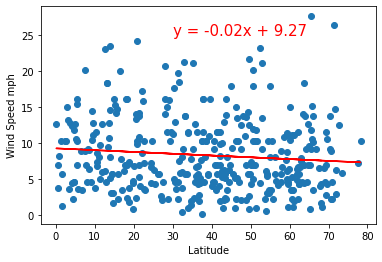

In [32]:
# gather the value and generate the scatter plot with linear regression
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0442


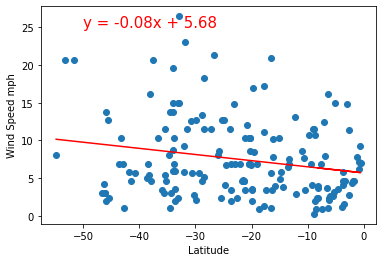

In [33]:
# gather the value and generate the scatter plot with linear regression
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2:.4f}")
plt.show()